## softmax function
## 여러개의 클래스가 있을 때 예측할 때

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], 
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
### one_hot_encoding
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

In [4]:
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

### Shape 주의

In [5]:
W = tf.Variable(tf.random_normal([4, nb_classes]), name = "Weight")
b = tf.Variable(tf.random_normal([nb_classes]), name = "bias")

In [6]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [7]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

3.1662304
0.6091089
0.50531197
0.4131853
0.32260874
0.24201001
0.21655223
0.19758326
0.18156421
0.16786462
0.15602285
[[4.7972747e-03 9.9519181e-01 1.0877244e-05]] [1]
--------------
[[4.7972747e-03 9.9519181e-01 1.0877244e-05]
 [8.6287361e-01 1.1935806e-01 1.7768307e-02]
 [1.5861557e-08 3.5815121e-04 9.9964178e-01]] [1 0 2]


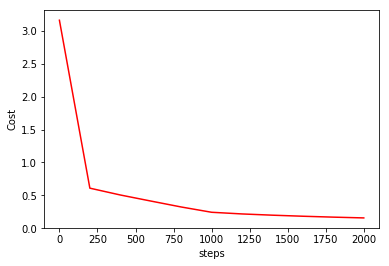

In [26]:
# For graph
steps = []
cost_val = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            steps.append(step)
            cost_v = sess.run(cost, feed_dict = {X: x_data, Y: y_data})
            cost_val.append(cost_v)
            print(cost_v)
#         if step % 200 == 0:
#             print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}))
#             print(cost)
            #         W_val.append(x_data)
#         cost_val.append(y_data)
    # arg_max는 최강자를 찾는거 인덱스를 반환
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.arg_max(a, 1)))
    
    print('--------------')
    all = sess.run(hypothesis, feed_dict={
                   X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))
    
    # 과제 1 cost의 감소 그래프로 확인하기
    # Graphic display
    plt.plot(steps, cost_val, 'r-')
    plt.ylabel('Cost')
    plt.xlabel('steps')
    plt.show()
    
    # 과제 2 learning rate 변화시켜서 그래프 각각 확인
    
    # 통통튀는거(발산)랑 충분히 감소하지 않을경우 2가지
    # 만번 ~ 2만번
    